In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import glob
import subprocess

In [2]:
with open("EVCS_15_B1.gms","r") as f:
    list_of_lines = f.readlines()
    
    
list_of_lines[137]

'eq_electricity_cost.. var_electricity_cost =E= sum(m, var_grid_energy(m) * electricity_prices(m)) + sum(m, var_grid_ex_energy(m) * electricity_prices(m) * 2)\n'

In [3]:
el_price = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]

In [4]:
for i in range(len(el_price)):
    
    with open("EVCS_15_B1.gms","r") as f:
        list_of_lines = f.readlines()
    
    list_of_lines[137] = "eq_electricity_cost.. var_electricity_cost =E= sum(m, var_grid_energy(m) * electricity_prices(m) *" + str(el_price[i]) + ") + sum(m, var_grid_ex_energy(m) * electricity_prices(m) * 2 *" + str(el_price[i]) + ") \n"
    
    
    print(list_of_lines[137])
    
    with open("EVCS_15_B1.gms", "w") as f:
        f.writelines(list_of_lines)
        
    subprocess.run(["gams", "EVCS_15_B1.gms", "logOption", "2"])
    
    subprocess.run(["move", "EVCS_15_B1_results.db", "EVCS_15_B1_results_" + str(el_price[i]) + ".db"], shell = True)
    
    print(el_price[i])

eq_electricity_cost.. var_electricity_cost =E= sum(m, var_grid_energy(m) * electricity_prices(m) *0.25) + sum(m, var_grid_ex_energy(m) * electricity_prices(m) * 2 *0.25) 

0.25
eq_electricity_cost.. var_electricity_cost =E= sum(m, var_grid_energy(m) * electricity_prices(m) *0.5) + sum(m, var_grid_ex_energy(m) * electricity_prices(m) * 2 *0.5) 

0.5
eq_electricity_cost.. var_electricity_cost =E= sum(m, var_grid_energy(m) * electricity_prices(m) *0.75) + sum(m, var_grid_ex_energy(m) * electricity_prices(m) * 2 *0.75) 

0.75
eq_electricity_cost.. var_electricity_cost =E= sum(m, var_grid_energy(m) * electricity_prices(m) *1) + sum(m, var_grid_ex_energy(m) * electricity_prices(m) * 2 *1) 

1
eq_electricity_cost.. var_electricity_cost =E= sum(m, var_grid_energy(m) * electricity_prices(m) *1.25) + sum(m, var_grid_ex_energy(m) * electricity_prices(m) * 2 *1.25) 

1.25
eq_electricity_cost.. var_electricity_cost =E= sum(m, var_grid_energy(m) * electricity_prices(m) *1.5) + sum(m, var_grid_ex_ene

In [5]:
#Extract result data from all result databases and create dataframes for each variable

grid_p = pd.DataFrame()
grid_ex_p = pd.DataFrame()
grid_tot_p = pd.DataFrame()

soc_pen = pd.DataFrame()

grid_e = pd.DataFrame()
grid_ex_e = pd.DataFrame()

ESS_lvl = pd.DataFrame()
ESS_p = pd.DataFrame()

sclrs = pd.DataFrame()

for filename in glob.glob('EVCS_15_B1_results*.db'):
    con = sqlite3.connect(filename)
    
    grid_power = pd.read_sql_query("SELECT * FROM var_grid_power", con)
    grid_extra_power = pd.read_sql_query("SELECT * FROM var_grid_ex_power", con)
    grid_total_power = pd.read_sql_query("SELECT * FROM var_grid_total_power", con)
    
    grid_energy = pd.read_sql_query("SELECT * FROM var_grid_energy", con)
    grid_extra_energy = pd.read_sql_query("SELECT * FROM var_grid_ex_energy", con)
    
    ESS_level = pd.read_sql_query('SELECT * FROM var_ESS_level', con)
    ESS_power = pd.read_sql_query('SELECT * FROM var_ESS_power', con)
    
    scalars =  pd.read_sql_query('SELECT * FROM scalarvariables', con)
    
    soc_penalty = pd.read_sql_query('SELECT * FROM var_SOC_pen', con)
    
    con.close()
    
    grid_p[filename[19:-3]] = grid_power['level'].copy()
    grid_ex_p[filename[19:-3]] = grid_extra_power['level'].copy()
    grid_tot_p[filename[19:-3]] = grid_total_power['level'].copy()
    
    grid_e[filename[19:-3]] = grid_energy['level'].copy()
    grid_ex_e[filename[19:-3]] = grid_extra_energy['level'].copy() 
    
    ESS_lvl[filename[19:-3]] = ESS_level['level'].copy()
    ESS_p[filename[19:-3]] = ESS_power['level'].copy()  
    
    sclrs[filename[19:-3]] = scalars['level'].copy()
    
    soc_pen[filename[19:-3]] = soc_penalty['level'].copy()



In [22]:
sclrs

,0.25,0.5,0.75,1.25,1.5,1.75,1,2.25,2.5,2.75,2,3
0,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500
1,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500
2,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900
3,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200
4,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500
5,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000
6,141094.230769,141094.230769,141094.230769,141094.230769,141094.230769,141094.230769,141094.230769,141094.230769,141094.230769,141094.230769,141094.230769,141094.230769
7,70555.077808,70555.077808,70555.077808,70555.077808,70555.077808,70555.077808,70555.077808,70555.077808,70555.077808,70555.077808,70555.077808,70555.077808
8,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477
9,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482


In [6]:
#Scalar variables are collected in one DF. In this cell this df is cleaned and sorted

sclrs = sclrs.set_index(scalars['name'])
sclrs1 = sclrs.T
sclrs1['var_ESS_size'] = sclrs1['var_ESS_size'] * 1.25
sclrs1.index = sclrs1.index.astype(float)
sclrs1 = sclrs1.sort_index(ascending = True)
sclrs1['ElPrice Multiplier'] = np.array(el_price)
sclrs1

name,var_ess_rated_power,var_grid_maxpower1,var_grid_maxpower2,var_grid_maxpower3,var_grid_maxpower4,var_ESS_cost,var_electricity_cost,var_grid_tariff_winter,var_energy_tax,months,var_system_cost,var_ESS_size,ElPrice Multiplier
0.25,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,35979.289009,70615.387186,3602.265477,4.283482,143655.751943,173.9625,0.25
0.50,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,71175.649752,70579.281754,3602.265477,4.283482,179416.991670,173.9625,0.50
0.75,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,106185.786568,70563.448366,3602.265477,4.283482,214894.133264,173.9625,0.75
1.00,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,70555.077808,3602.265477,4.283482,250226.181074,173.9625,1.00
1.25,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,175905.801714,70549.287059,3602.265477,4.283482,285445.990781,173.9625,1.25
1.50,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,210759.380750,70546.244116,3602.265477,4.283482,320599.356893,173.9625,1.50
1.75,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,245483.596063,70544.232089,3602.265477,4.283482,355694.201846,173.9625,1.75
2.00,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,280235.969122,70543.095968,3602.265477,4.283482,390743.081540,173.9625,2.00
2.25,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,315018.128983,70542.329270,3602.265477,4.283482,425758.212131,173.9625,2.25
2.50,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,349650.089490,70541.392570,3602.265477,4.283482,460741.542377,173.9625,2.50


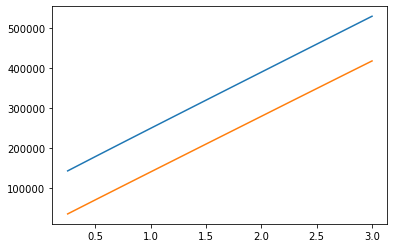

In [7]:
x = sclrs1['ElPrice Multiplier']
y = sclrs1['var_system_cost']
z = sclrs1['var_electricity_cost']

plt.plot(x,y)
plt.plot(x,z)